In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sys

from sklearn.model_selection import train_test_split
from preprocessing.preprocessing import preprocess_data, amenitiesColumns
from scipy.stats import skew

data = pd.read_csv('data/train.csv')

data = data[data.log_price != 0]

train_val, test = train_test_split(data, test_size = .2, random_state = 420) # test -> zbiór do finalej walidacji po wybraniu modelu

train_val.head(3)

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
68899,16038487,7.073270,Other,Private room,"{""Cable TV"",Internet,""Wireless Internet"",""Whee...",2,2.0,Futon,strict,True,...,33.902953,-118.260560,Party Warehouse Spacious Industrial,NaN,0,NaN,https://a0.muscache.com/im/pictures/64461854/4...,90015,1.0,1.0
2861,1963542,4.691348,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4,1.0,Real Bed,strict,True,...,41.884080,-87.633697,Fully Furnished 1 BDR in the loop! Chicago 3,Loop,3,87.0,NaN,60606,1.0,2.0
72304,6574537,4.007333,House,Private room,"{""Wireless Internet"",""Air conditioning"",""Pets ...",3,1.5,Real Bed,strict,False,...,34.086815,-118.253330,A big room with your own entrance,Echo Park,3,100.0,https://a0.muscache.com/im/pictures/88934828-1...,90026,1.0,2.0


In [2]:
train, val = train_test_split(train_val, test_size = .2, random_state = 420)

y_train = train[['log_price']]
X_train = train[train.columns.drop('log_price')]
y_val = val[['log_price']]
X_val = val[val.columns.drop('log_price')]

In [3]:
X_train = preprocess_data(X_train)
X_val = preprocess_data(X_val, test_data = True)

['24_hour_check_in', '_smooth_pathway_to_front_door', 'accessible_height_bed', 'accessible_height_toilet', 'accommodates', 'air_conditioning', 'air_purifier', 'baby_bath', 'baby_monitor', 'babysitter_recommendations', 'bathrooms', 'bathtub', 'bathtub_with_shower_chair', 'bbq_grill', 'beach_essentials', 'beachfront', 'bed_linens', 'bed_type', 'bedrooms', 'beds', 'breakfast', 'buzzer_wireless_intercom', 'cable_tv', 'cancellation_policy', 'carbon_monoxide_detector', 'cat_s_', 'changing_table', 'children’s_books_and_toys', 'children’s_dinnerware', 'city', 'cleaning_before_checkout', 'cleaning_fee', 'coffee_maker', 'cooking_basics', 'crib', 'disabled_parking_spot', 'dishes_and_silverware', 'dishwasher', 'dog_s_', 'doorman', 'doorman_entry', 'dryer', 'elevator', 'elevator_in_building', 'essentials', 'ethernet_connection', 'ev_charger', 'extra_pillows_and_blankets', 'family_kid_friendly', 'fire_extinguisher', 'fireplace_guards', 'firm_mattress', 'first_aid_kit', 'first_review_month', 'first_r

In [4]:
X_train[0].shape

(193,)

In [5]:
from catboost import CatBoostRegressor
cb = CatBoostRegressor()
cb.fit(X_train, y_train)
pred = cb.predict(X_val)

Learning rate set to 0.075335
0:	learn: 0.6880874	total: 193ms	remaining: 3m 12s
1:	learn: 0.6641096	total: 199ms	remaining: 1m 39s
2:	learn: 0.6416134	total: 206ms	remaining: 1m 8s
3:	learn: 0.6217125	total: 212ms	remaining: 52.8s
4:	learn: 0.6032663	total: 218ms	remaining: 43.4s
5:	learn: 0.5873794	total: 224ms	remaining: 37.1s
6:	learn: 0.5732220	total: 230ms	remaining: 32.6s
7:	learn: 0.5599517	total: 236ms	remaining: 29.2s
8:	learn: 0.5486483	total: 242ms	remaining: 26.6s
9:	learn: 0.5382331	total: 248ms	remaining: 24.5s
10:	learn: 0.5289019	total: 253ms	remaining: 22.8s
11:	learn: 0.5209983	total: 260ms	remaining: 21.4s
12:	learn: 0.5129180	total: 266ms	remaining: 20.2s
13:	learn: 0.5050805	total: 272ms	remaining: 19.2s
14:	learn: 0.4990497	total: 279ms	remaining: 18.3s
15:	learn: 0.4935301	total: 285ms	remaining: 17.5s
16:	learn: 0.4876610	total: 291ms	remaining: 16.8s
17:	learn: 0.4827565	total: 297ms	remaining: 16.2s
18:	learn: 0.4786316	total: 303ms	remaining: 15.7s
19:	learn

164:	learn: 0.3872256	total: 1.26s	remaining: 6.39s
165:	learn: 0.3870480	total: 1.27s	remaining: 6.37s
166:	learn: 0.3867999	total: 1.27s	remaining: 6.36s
167:	learn: 0.3865823	total: 1.28s	remaining: 6.35s
168:	learn: 0.3864518	total: 1.29s	remaining: 6.33s
169:	learn: 0.3862641	total: 1.29s	remaining: 6.32s
170:	learn: 0.3860736	total: 1.3s	remaining: 6.31s
171:	learn: 0.3859449	total: 1.31s	remaining: 6.29s
172:	learn: 0.3857718	total: 1.31s	remaining: 6.28s
173:	learn: 0.3856601	total: 1.32s	remaining: 6.26s
174:	learn: 0.3855279	total: 1.32s	remaining: 6.25s
175:	learn: 0.3853920	total: 1.33s	remaining: 6.23s
176:	learn: 0.3852566	total: 1.34s	remaining: 6.22s
177:	learn: 0.3851108	total: 1.34s	remaining: 6.2s
178:	learn: 0.3849904	total: 1.35s	remaining: 6.19s
179:	learn: 0.3848356	total: 1.35s	remaining: 6.17s
180:	learn: 0.3847285	total: 1.36s	remaining: 6.16s
181:	learn: 0.3844687	total: 1.37s	remaining: 6.15s
182:	learn: 0.3843327	total: 1.37s	remaining: 6.13s
183:	learn: 0.

336:	learn: 0.3686260	total: 2.33s	remaining: 4.59s
337:	learn: 0.3685379	total: 2.34s	remaining: 4.58s
338:	learn: 0.3684563	total: 2.35s	remaining: 4.57s
339:	learn: 0.3683811	total: 2.35s	remaining: 4.56s
340:	learn: 0.3683195	total: 2.36s	remaining: 4.56s
341:	learn: 0.3682670	total: 2.37s	remaining: 4.55s
342:	learn: 0.3681934	total: 2.37s	remaining: 4.54s
343:	learn: 0.3681392	total: 2.38s	remaining: 4.53s
344:	learn: 0.3681186	total: 2.38s	remaining: 4.53s
345:	learn: 0.3680483	total: 2.39s	remaining: 4.52s
346:	learn: 0.3680014	total: 2.4s	remaining: 4.51s
347:	learn: 0.3679512	total: 2.4s	remaining: 4.5s
348:	learn: 0.3679192	total: 2.42s	remaining: 4.5s
349:	learn: 0.3678597	total: 2.42s	remaining: 4.5s
350:	learn: 0.3677975	total: 2.43s	remaining: 4.49s
351:	learn: 0.3676905	total: 2.44s	remaining: 4.49s
352:	learn: 0.3676136	total: 2.44s	remaining: 4.48s
353:	learn: 0.3675484	total: 2.45s	remaining: 4.47s
354:	learn: 0.3674885	total: 2.46s	remaining: 4.46s
355:	learn: 0.367

498:	learn: 0.3584424	total: 3.39s	remaining: 3.41s
499:	learn: 0.3583764	total: 3.4s	remaining: 3.4s
500:	learn: 0.3583095	total: 3.41s	remaining: 3.39s
501:	learn: 0.3582682	total: 3.41s	remaining: 3.38s
502:	learn: 0.3582296	total: 3.42s	remaining: 3.38s
503:	learn: 0.3581617	total: 3.42s	remaining: 3.37s
504:	learn: 0.3581258	total: 3.43s	remaining: 3.36s
505:	learn: 0.3580595	total: 3.44s	remaining: 3.35s
506:	learn: 0.3580103	total: 3.44s	remaining: 3.35s
507:	learn: 0.3579015	total: 3.45s	remaining: 3.34s
508:	learn: 0.3578375	total: 3.46s	remaining: 3.33s
509:	learn: 0.3577981	total: 3.46s	remaining: 3.33s
510:	learn: 0.3577173	total: 3.47s	remaining: 3.32s
511:	learn: 0.3576723	total: 3.48s	remaining: 3.31s
512:	learn: 0.3576412	total: 3.48s	remaining: 3.31s
513:	learn: 0.3575798	total: 3.49s	remaining: 3.3s
514:	learn: 0.3575202	total: 3.49s	remaining: 3.29s
515:	learn: 0.3574662	total: 3.5s	remaining: 3.28s
516:	learn: 0.3574226	total: 3.51s	remaining: 3.28s
517:	learn: 0.35

669:	learn: 0.3495931	total: 4.46s	remaining: 2.2s
670:	learn: 0.3495677	total: 4.46s	remaining: 2.19s
671:	learn: 0.3495080	total: 4.47s	remaining: 2.18s
672:	learn: 0.3494712	total: 4.48s	remaining: 2.18s
673:	learn: 0.3494163	total: 4.48s	remaining: 2.17s
674:	learn: 0.3493503	total: 4.49s	remaining: 2.16s
675:	learn: 0.3492991	total: 4.5s	remaining: 2.15s
676:	learn: 0.3492454	total: 4.5s	remaining: 2.15s
677:	learn: 0.3491934	total: 4.51s	remaining: 2.14s
678:	learn: 0.3491358	total: 4.52s	remaining: 2.13s
679:	learn: 0.3490918	total: 4.52s	remaining: 2.13s
680:	learn: 0.3490107	total: 4.53s	remaining: 2.12s
681:	learn: 0.3489748	total: 4.54s	remaining: 2.12s
682:	learn: 0.3489460	total: 4.54s	remaining: 2.11s
683:	learn: 0.3488992	total: 4.55s	remaining: 2.1s
684:	learn: 0.3488809	total: 4.55s	remaining: 2.09s
685:	learn: 0.3488266	total: 4.56s	remaining: 2.09s
686:	learn: 0.3487772	total: 4.57s	remaining: 2.08s
687:	learn: 0.3487751	total: 4.58s	remaining: 2.07s
688:	learn: 0.34

835:	learn: 0.3426565	total: 5.53s	remaining: 1.08s
836:	learn: 0.3425938	total: 5.53s	remaining: 1.08s
837:	learn: 0.3425437	total: 5.54s	remaining: 1.07s
838:	learn: 0.3424908	total: 5.55s	remaining: 1.06s
839:	learn: 0.3424261	total: 5.55s	remaining: 1.06s
840:	learn: 0.3423783	total: 5.56s	remaining: 1.05s
841:	learn: 0.3423512	total: 5.57s	remaining: 1.04s
842:	learn: 0.3423302	total: 5.57s	remaining: 1.04s
843:	learn: 0.3422831	total: 5.58s	remaining: 1.03s
844:	learn: 0.3422439	total: 5.58s	remaining: 1.02s
845:	learn: 0.3421875	total: 5.59s	remaining: 1.02s
846:	learn: 0.3421459	total: 5.6s	remaining: 1.01s
847:	learn: 0.3421036	total: 5.6s	remaining: 1s
848:	learn: 0.3420620	total: 5.61s	remaining: 998ms
849:	learn: 0.3420454	total: 5.62s	remaining: 991ms
850:	learn: 0.3420128	total: 5.62s	remaining: 984ms
851:	learn: 0.3419956	total: 5.63s	remaining: 978ms
852:	learn: 0.3419759	total: 5.63s	remaining: 971ms
853:	learn: 0.3419249	total: 5.64s	remaining: 964ms
854:	learn: 0.341

In [6]:
feat_imp = cb.get_feature_importance()

In [7]:
a = ['24_hour_check_in', '_smooth_pathway_to_front_door', 'accessible_height_bed', 'accessible_height_toilet', 'accommodates', 'air_conditioning', 'air_purifier', 'baby_bath', 'baby_monitor', 'babysitter_recommendations', 'bathrooms', 'bathtub', 'bathtub_with_shower_chair', 'bbq_grill', 'beach_essentials', 'beachfront', 'bed_linens', 'bed_type', 'bedrooms', 'beds', 'breakfast', 'buzzer_wireless_intercom', 'cable_tv', 'cancellation_policy', 'carbon_monoxide_detector', 'cat_s_', 'changing_table', 'children’s_books_and_toys', 'children’s_dinnerware', 'city', 'cleaning_before_checkout', 'cleaning_fee', 'coffee_maker', 'cooking_basics', 'crib', 'disabled_parking_spot', 'dishes_and_silverware', 'dishwasher', 'dog_s_', 'doorman', 'doorman_entry', 'dryer', 'elevator', 'elevator_in_building', 'essentials', 'ethernet_connection', 'ev_charger', 'extra_pillows_and_blankets', 'family_kid_friendly', 'fire_extinguisher', 'fireplace_guards', 'firm_mattress', 'first_aid_kit', 'first_review_month', 'first_review_year', 'fixed_grab_bars_for_shower___toilet', 'flat', 'flat_smooth_pathway_to_front_door', 'free_parking_on_premises', 'free_parking_on_street', 'game_console', 'garden_or_backyard', 'grab_rails_for_shower_and_toilet', 'ground_floor_access', 'gym', 'hair_dryer', 'handheld_shower_head', 'hangers', 'heating', 'high_chair', 'host_greets_you', 'host_has_profile_pic', 'host_identity_verified', 'host_response_rate', 'host_since_month', 'host_since_year', 'hot_tub', 'hot_water', 'hot_water_kettle', 'indoor_fireplace', 'instant_bookable', 'internet', 'iron', 'keypad', 'kitchen', 'lake_access', 'laptop_friendly_workspace', 'last_review_month', 'last_review_year', 'latitude', 'lock_on_bedroom_door', 'lockbox', 'long_term_stays_allowed', 'longitude', 'luggage_dropoff_allowed', 'microwave', 'number_of_reviews', 'other', 'other_pet_s_', 'outlet_covers', 'oven', 'pack_’n_play_travel_crib', 'paid_parking_off_premises', 'path_to_entrance_lit_at_night', 'patio_or_balcony', 'pets_allowed', 'pets_live_on_this_property', 'pocket_wifi', 'pool', 'private_bathroom', 'private_entrance', 'private_living_room', 'property_type', 'refrigerator', 'review_scores_rating', 'roll_in_shower_with_chair', 'room_darkening_shades', 'room_type', 'safety_card', 'self_check_in', 'shampoo', 'single_level_home', 'ski_in_ski_out', 'smart_lock', 'smartlock', 'smoke_detector', 'smoking_allowed', 'stair_gates', 'step_free_access', 'stove', 'suitable_for_events', 'table_corner_guards', 'translation_missing__en_hosting_amenity_49', 'translation_missing__en_hosting_amenity_50', 'tv', 'washer', 'washer___dryer', 'waterfront', 'well_lit_path_to_entrance', 'wheelchair_accessible', 'wide_clearance_to_bed', 'wide_clearance_to_shower___toilet', 'wide_clearance_to_shower_and_toilet', 'wide_doorway', 'wide_entryway', 'wide_hallway_clearance', 'window_guards', 'wireless_internet']
b = ['knn__bathrooms', 'knn__beds', 'knn__bedrooms', 'knn__host_response_rate', 'iter__review_scores_rating', 'ord_enc__cancellation_policy', 'ord_enc__cleaning_fee', 'ord_enc__host_has_profile_pic', 'ord_enc__host_identity_verified', 'ord_enc__instant_bookable', 'one_hot__x0_Entire home/apt', 'one_hot__x0_Private room', 'one_hot__x0_Shared room', 'one_hot__x1_Airbed', 'one_hot__x1_Couch', 'one_hot__x1_Futon', 'one_hot__x1_Pull-out Sofa', 'one_hot__x1_Real Bed', 'one_hot__x2_Boston', 'one_hot__x2_Chicago', 'one_hot__x2_DC', 'one_hot__x2_LA', 'one_hot__x2_NYC', 'one_hot__x2_SF', 'one_hot__x3_Apartment', 'one_hot__x3_Bed & Breakfast', 'one_hot__x3_Boat', 'one_hot__x3_Boutique hotel', 'one_hot__x3_Bungalow', 'one_hot__x3_Cabin', 'one_hot__x3_Camper/RV', 'one_hot__x3_Casa particular', 'one_hot__x3_Castle', 'one_hot__x3_Cave', 'one_hot__x3_Chalet', 'one_hot__x3_Condominium', 'one_hot__x3_Dorm', 'one_hot__x3_Earth House', 'one_hot__x3_Guest suite', 'one_hot__x3_Guesthouse', 'one_hot__x3_Hostel', 'one_hot__x3_House', 'one_hot__x3_Hut', 'one_hot__x3_In-law', 'one_hot__x3_Island', 'one_hot__x3_Lighthouse', 'one_hot__x3_Loft', 'one_hot__x3_Other', 'one_hot__x3_Parking Space', 'one_hot__x3_Serviced apartment', 'one_hot__x3_Tent', 'one_hot__x3_Timeshare', 'one_hot__x3_Tipi', 'one_hot__x3_Townhouse', 'one_hot__x3_Train', 'one_hot__x3_Treehouse', 'one_hot__x3_Vacation home', 'one_hot__x3_Villa', 'one_hot__x3_Yurt']
a_new = []
tmp = ['room_type', 'bed_type', 'city', 'property_type', 'bathrooms', 'beds', 'bedrooms', 'host_response_rate', 'review_scores_rating',
         'cancellation_policy', 'cleaning_fee', 'host_has_profile_pic', "host_identity_verified", 'instant_bookable']
for el in a:
    if el not in tmp:
        a_new.append(el)
print('a: ' + str(len(a)))
c = b + a_new
print('c: ' + str(len(c)))

a: 148
c: 193


In [8]:
X_train = pd.DataFrame(X_train, columns = c)

In [9]:
X_val = pd.DataFrame(X_val, columns = c)
X_val

,knn__bathrooms,knn__beds,knn__bedrooms,knn__host_response_rate,iter__review_scores_rating,ord_enc__cancellation_policy,ord_enc__cleaning_fee,ord_enc__host_has_profile_pic,ord_enc__host_identity_verified,ord_enc__instant_bookable,...,well_lit_path_to_entrance,wheelchair_accessible,wide_clearance_to_bed,wide_clearance_to_shower___toilet,wide_clearance_to_shower_and_toilet,wide_doorway,wide_entryway,wide_hallway_clearance,window_guards,wireless_internet
0,1.0,2.0,1.0,100.0,94.052576,4.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,1.0,100.0,95.000000,2.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,2.0,1.0,100.0,93.000000,4.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,1.0,1.0,100.0,94.052576,4.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,1.0,1.0,100.0,95.000000,4.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11853,1.0,1.0,1.0,100.0,94.052576,4.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11854,1.5,2.0,2.0,100.0,100.000000,4.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11855,1.0,3.0,0.0,100.0,100.000000,4.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11856,1.0,1.0,1.0,100.0,100.000000,4.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [10]:
feat_imp

array([6.71035209e+00, 4.61269372e-01, 4.56967858e+00, 6.17777730e-01,
       1.43509580e+00, 3.87716894e-01, 6.83314862e-01, 5.36588600e-02,
       1.86711545e-01, 1.41656401e-01, 2.40035464e+01, 3.39065770e-01,
       2.08125055e+00, 2.64814825e-02, 4.34288835e-02, 5.55228161e-03,
       2.07810526e-02, 6.80718426e-02, 0.00000000e+00, 4.91111594e-01,
       1.72503399e+00, 9.06889962e-01, 7.30608846e-01, 6.31877667e-01,
       5.78230941e-01, 3.61495975e-02, 2.82617372e-02, 1.49698599e-02,
       0.00000000e+00, 5.99744403e-04, 3.09830904e-02, 9.12899125e-06,
       2.98381310e-03, 0.00000000e+00, 0.00000000e+00, 7.52406523e-02,
       2.43927028e-02, 6.39021416e-04, 4.52120911e-04, 8.86637246e-03,
       2.01622294e-02, 2.66842016e-01, 0.00000000e+00, 1.25651680e-02,
       1.12958172e-04, 0.00000000e+00, 1.50638109e-01, 1.00319750e-01,
       9.74423174e-05, 1.98064423e-03, 1.05584474e-02, 7.64763725e-03,
       0.00000000e+00, 7.72824312e-02, 5.74709221e-06, 7.72234636e-04,
      

## Wpływ poszczególnych kolumn na predykcyjność modelu (CatBoost)

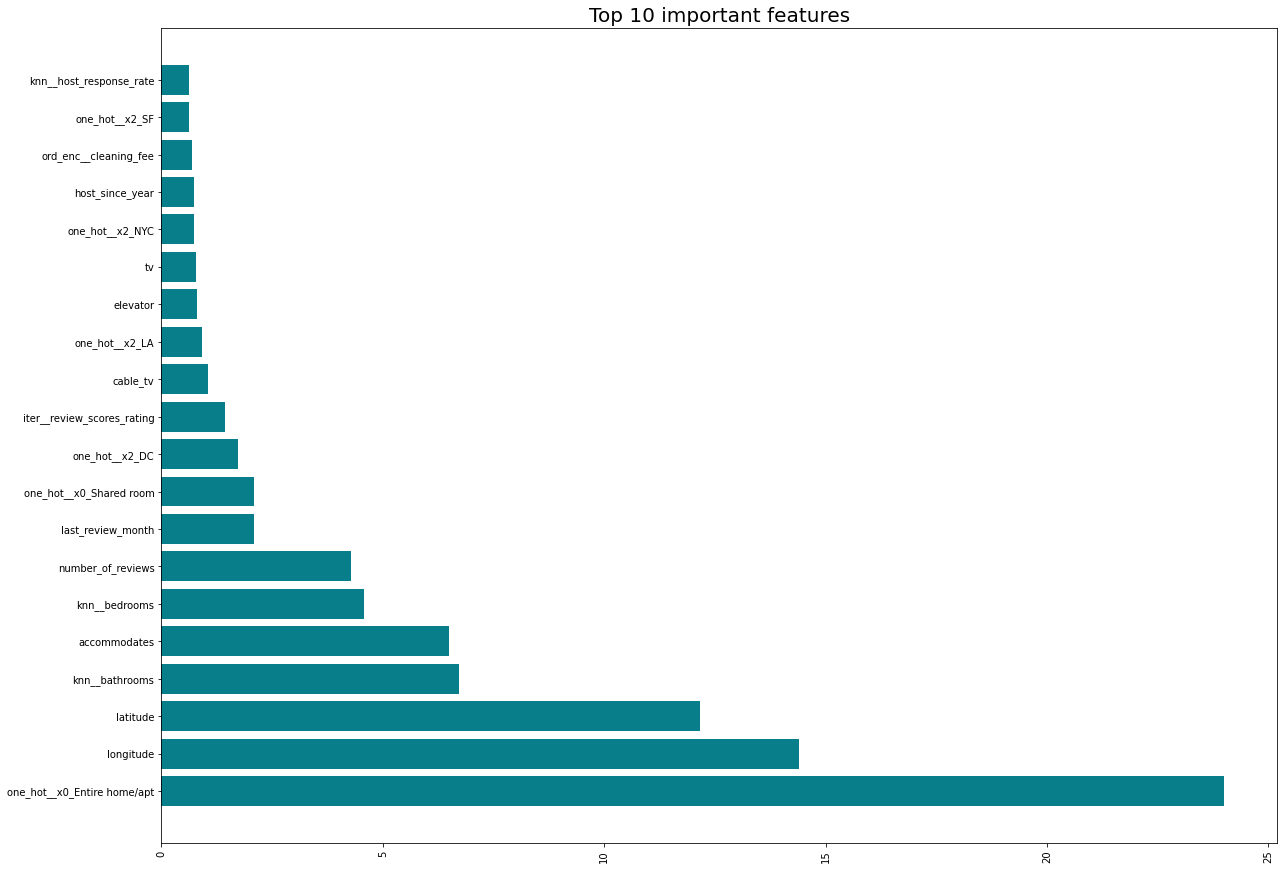

In [11]:
importances = pd.DataFrame(data={
    'name': c,
    'importance': feat_imp
})

importances = importances.sort_values(by='importance', ascending=False)

plt.figure(figsize=(20,15))
plt.barh(y=importances['name'][:20], width=importances['importance'][:20], color='#087E8B')
plt.title('Top 10 important features', size=20)
plt.xticks(rotation='vertical')
plt.show()

## Usunięcie kolumn silnie skorelowanych z mniejszą predykcyjnością dla modelu

In [12]:
corr_matrix = X_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

def col_to_drop(dataset, upper):
    to_drop = []
    for column in upper.columns:
        if any(upper[column] > .9):
            correlated = upper[upper[column] > .9].index
            for col in correlated:
                if dataset[dataset['name'] == col]['importance'].values[0] < dataset[dataset['name'] == column]['importance'].values[0]:
                    to_drop.append(col)
                else:
                    to_drop.append(column)
    return to_drop

to_drop = col_to_drop(importances, upper)

In [13]:
X_train.drop(to_drop, axis=1, inplace=True)
X_val.drop(to_drop, axis=1, inplace=True)

In [14]:
X_train.shape

(47430, 184)

In [15]:
X_val.shape

(11858, 184)

## Redukcja skośności

In [16]:
features = list(X_train.select_dtypes('float64').columns)

high_skewness = []

In [17]:
for el in features:
    if skew(X_train[el]) > 1.5:
        high_skewness.append(el)

In [18]:
X_train[high_skewness] = np.log2(X_train[high_skewness] + sys.float_info.epsilon)
X_val[high_skewness] = np.log2(X_val[high_skewness] + sys.float_info.epsilon)

# Regresja liniowa

In [ ]:
from sklearn.linear_model import LinearRegression


linreg = LinearRegression()

linreg.fit(X_train, y_train)

In [ ]:
predictions = linreg.predict(X_val)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print(f"MAE: {mean_absolute_error(y_val, predictions):.3}")
print(f"RMSE: {mean_squared_error(y_val, predictions):.3}")
print(f"R2 score: {r2_score(y_val, predictions):.3}")

# XGBRegressor

In [ ]:
import xgboost as xgb

In [ ]:
xgbreg = xgb.XGBRegressor()

xgbreg.fit(X_train, y_train)

In [ ]:
predictions = xgbreg.predict(X_val)

In [ ]:
print(f"MAE: {mean_absolute_error(y_val, predictions):.3}")
print(f"RMSE: {mean_squared_error(y_val, predictions):.3}")
print(f"R2 score: {r2_score(y_val, predictions):.3}")

# Sieć neuronowa

In [ ]:
# import tensorflow as tf


# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(150, activation='relu'),
#     tf.keras.layers.Dropout(.2),
#     tf.keras.layers.Dense(450, activation='relu'),
#     tf.keras.layers.Dropout(.2),
#     tf.keras.layers.Dense(250, activation='relu'),
#     tf.keras.layers.Dense(1, activation = 'linear')
# ])

# model.compile(loss = tf.keras.losses.MeanSquaredError(),
#               optimizer = tf.keras.optimizers.Adam(),
#               metrics = [tf.keras.losses.MeanSquaredError()])

# history = model.fit(X_train, y_train, epochs = 10, validation_split = 0.15)

In [ ]:
# def plot_history(history, key):
#     plt.plot(history.history[key])
#     plt.plot(history.history['val_'+key])
#     plt.xlabel("Epochs")
#     plt.ylabel(key)
#     plt.legend([key, 'val_'+key])
#     plt.show()
# # Plot the history
# plot_history(history, 'mean_squared_error')

In [ ]:
#model.evaluate(X_val, y_val)

# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

rfr.fit(X_train, y_train)

predictions = rfr.predict(X_val)

print(f"MAE: {mean_absolute_error(y_val, predictions):.3}")
print(f"RMSE: {mean_squared_error(y_val, predictions):.3}")
print(f"R2 score: {r2_score(y_val, predictions):.3}")

# SVM

In [ ]:
# from sklearn.svm import SVR

# supp_vec = SVR()

# supp_vec.fit(X_train, y_train)

# predictions = supp_vec.predict(X_val)

# print(f"MAE: {mean_absolute_error(y_val, predictions):.3}")
# print(f"RMSE: {mean_squared_error(y_val, predictions):.3}")
# print(f"R2 score: {r2_score(y_val, predictions):.3}")

# CatBoost

In [35]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

ctboost = CatBoostRegressor(iterations = 5000, learning_rate = 0.03, task_type = 'GPU')

ctboost.fit(X_train, y_train)

predictions = ctboost.predict(X_val)

print(f"MAE: {mean_absolute_error(y_val, predictions):.3}")
print(f"RMSE: {mean_squared_error(y_val, predictions):.3}")
print(f"R2 score: {r2_score(y_val, predictions):.3}")

0:	learn: 0.7045443	total: 6.77ms	remaining: 33.8s
1:	learn: 0.6940646	total: 12.7ms	remaining: 31.8s
2:	learn: 0.6839726	total: 18.5ms	remaining: 30.8s
3:	learn: 0.6743955	total: 24.3ms	remaining: 30.3s
4:	learn: 0.6650227	total: 30.2ms	remaining: 30.2s
5:	learn: 0.6559789	total: 35.9ms	remaining: 29.9s
6:	learn: 0.6475733	total: 42.2ms	remaining: 30.1s
7:	learn: 0.6395400	total: 48.8ms	remaining: 30.5s
8:	learn: 0.6315646	total: 55.1ms	remaining: 30.5s
9:	learn: 0.6237616	total: 61ms	remaining: 30.4s
10:	learn: 0.6165900	total: 66.7ms	remaining: 30.2s
11:	learn: 0.6095961	total: 72.6ms	remaining: 30.2s
12:	learn: 0.6028182	total: 78.7ms	remaining: 30.2s
13:	learn: 0.5963214	total: 84.7ms	remaining: 30.2s
14:	learn: 0.5903863	total: 90.5ms	remaining: 30.1s
15:	learn: 0.5847756	total: 96ms	remaining: 29.9s
16:	learn: 0.5791118	total: 102ms	remaining: 29.8s
17:	learn: 0.5736317	total: 108ms	remaining: 29.9s
18:	learn: 0.5684952	total: 114ms	remaining: 30s
19:	learn: 0.5635670	total: 121

174:	learn: 0.4121738	total: 1.08s	remaining: 29.8s
175:	learn: 0.4119750	total: 1.09s	remaining: 29.8s
176:	learn: 0.4118292	total: 1.09s	remaining: 29.8s
177:	learn: 0.4117046	total: 1.1s	remaining: 29.8s
178:	learn: 0.4115452	total: 1.1s	remaining: 29.8s
179:	learn: 0.4113649	total: 1.11s	remaining: 29.8s
180:	learn: 0.4111743	total: 1.12s	remaining: 29.7s
181:	learn: 0.4110610	total: 1.12s	remaining: 29.7s
182:	learn: 0.4109291	total: 1.13s	remaining: 29.7s
183:	learn: 0.4107388	total: 1.13s	remaining: 29.7s
184:	learn: 0.4105290	total: 1.14s	remaining: 29.7s
185:	learn: 0.4104282	total: 1.15s	remaining: 29.7s
186:	learn: 0.4103161	total: 1.15s	remaining: 29.7s
187:	learn: 0.4101082	total: 1.16s	remaining: 29.6s
188:	learn: 0.4099322	total: 1.16s	remaining: 29.6s
189:	learn: 0.4098151	total: 1.17s	remaining: 29.6s
190:	learn: 0.4096233	total: 1.18s	remaining: 29.6s
191:	learn: 0.4094371	total: 1.18s	remaining: 29.6s
192:	learn: 0.4093155	total: 1.19s	remaining: 29.6s
193:	learn: 0.

347:	learn: 0.3925947	total: 2.15s	remaining: 28.7s
348:	learn: 0.3925283	total: 2.15s	remaining: 28.7s
349:	learn: 0.3924537	total: 2.16s	remaining: 28.7s
350:	learn: 0.3923886	total: 2.17s	remaining: 28.7s
351:	learn: 0.3922767	total: 2.17s	remaining: 28.7s
352:	learn: 0.3921525	total: 2.18s	remaining: 28.7s
353:	learn: 0.3920914	total: 2.18s	remaining: 28.7s
354:	learn: 0.3920199	total: 2.19s	remaining: 28.7s
355:	learn: 0.3919538	total: 2.2s	remaining: 28.7s
356:	learn: 0.3918679	total: 2.2s	remaining: 28.6s
357:	learn: 0.3917701	total: 2.21s	remaining: 28.6s
358:	learn: 0.3916877	total: 2.21s	remaining: 28.6s
359:	learn: 0.3916502	total: 2.22s	remaining: 28.6s
360:	learn: 0.3915974	total: 2.23s	remaining: 28.6s
361:	learn: 0.3914748	total: 2.23s	remaining: 28.6s
362:	learn: 0.3913725	total: 2.24s	remaining: 28.6s
363:	learn: 0.3913178	total: 2.24s	remaining: 28.6s
364:	learn: 0.3912265	total: 2.25s	remaining: 28.6s
365:	learn: 0.3911498	total: 2.25s	remaining: 28.6s
366:	learn: 0.

522:	learn: 0.3809037	total: 3.21s	remaining: 27.5s
523:	learn: 0.3808517	total: 3.22s	remaining: 27.5s
524:	learn: 0.3807917	total: 3.23s	remaining: 27.5s
525:	learn: 0.3807602	total: 3.23s	remaining: 27.5s
526:	learn: 0.3807029	total: 3.24s	remaining: 27.5s
527:	learn: 0.3806538	total: 3.24s	remaining: 27.5s
528:	learn: 0.3806088	total: 3.25s	remaining: 27.5s
529:	learn: 0.3805524	total: 3.26s	remaining: 27.5s
530:	learn: 0.3804854	total: 3.26s	remaining: 27.5s
531:	learn: 0.3804234	total: 3.27s	remaining: 27.4s
532:	learn: 0.3803728	total: 3.27s	remaining: 27.4s
533:	learn: 0.3803251	total: 3.28s	remaining: 27.4s
534:	learn: 0.3802897	total: 3.29s	remaining: 27.4s
535:	learn: 0.3802297	total: 3.29s	remaining: 27.4s
536:	learn: 0.3801514	total: 3.3s	remaining: 27.4s
537:	learn: 0.3800967	total: 3.3s	remaining: 27.4s
538:	learn: 0.3800506	total: 3.31s	remaining: 27.4s
539:	learn: 0.3799987	total: 3.32s	remaining: 27.4s
540:	learn: 0.3799657	total: 3.32s	remaining: 27.4s
541:	learn: 0.

701:	learn: 0.3730569	total: 4.29s	remaining: 26.3s
702:	learn: 0.3730224	total: 4.29s	remaining: 26.3s
703:	learn: 0.3729923	total: 4.3s	remaining: 26.3s
704:	learn: 0.3729509	total: 4.31s	remaining: 26.2s
705:	learn: 0.3729057	total: 4.31s	remaining: 26.2s
706:	learn: 0.3728770	total: 4.32s	remaining: 26.2s
707:	learn: 0.3728527	total: 4.33s	remaining: 26.2s
708:	learn: 0.3728054	total: 4.33s	remaining: 26.2s
709:	learn: 0.3727763	total: 4.34s	remaining: 26.2s
710:	learn: 0.3727413	total: 4.34s	remaining: 26.2s
711:	learn: 0.3726907	total: 4.35s	remaining: 26.2s
712:	learn: 0.3726720	total: 4.35s	remaining: 26.2s
713:	learn: 0.3726150	total: 4.36s	remaining: 26.2s
714:	learn: 0.3725654	total: 4.37s	remaining: 26.2s
715:	learn: 0.3725242	total: 4.37s	remaining: 26.2s
716:	learn: 0.3724768	total: 4.38s	remaining: 26.2s
717:	learn: 0.3724412	total: 4.38s	remaining: 26.1s
718:	learn: 0.3724204	total: 4.39s	remaining: 26.1s
719:	learn: 0.3723808	total: 4.39s	remaining: 26.1s
720:	learn: 0

881:	learn: 0.3671542	total: 5.36s	remaining: 25s
882:	learn: 0.3671320	total: 5.36s	remaining: 25s
883:	learn: 0.3671147	total: 5.37s	remaining: 25s
884:	learn: 0.3670867	total: 5.37s	remaining: 25s
885:	learn: 0.3670466	total: 5.38s	remaining: 25s
886:	learn: 0.3670224	total: 5.38s	remaining: 25s
887:	learn: 0.3669989	total: 5.39s	remaining: 25s
888:	learn: 0.3669487	total: 5.4s	remaining: 25s
889:	learn: 0.3669180	total: 5.4s	remaining: 24.9s
890:	learn: 0.3669042	total: 5.41s	remaining: 24.9s
891:	learn: 0.3668814	total: 5.41s	remaining: 24.9s
892:	learn: 0.3668619	total: 5.42s	remaining: 24.9s
893:	learn: 0.3668303	total: 5.42s	remaining: 24.9s
894:	learn: 0.3667882	total: 5.43s	remaining: 24.9s
895:	learn: 0.3667481	total: 5.44s	remaining: 24.9s
896:	learn: 0.3667302	total: 5.44s	remaining: 24.9s
897:	learn: 0.3667041	total: 5.45s	remaining: 24.9s
898:	learn: 0.3666871	total: 5.45s	remaining: 24.9s
899:	learn: 0.3666623	total: 5.46s	remaining: 24.9s
900:	learn: 0.3666301	total: 5

1062:	learn: 0.3621738	total: 6.42s	remaining: 23.8s
1063:	learn: 0.3621505	total: 6.43s	remaining: 23.8s
1064:	learn: 0.3621314	total: 6.44s	remaining: 23.8s
1065:	learn: 0.3621046	total: 6.44s	remaining: 23.8s
1066:	learn: 0.3620749	total: 6.45s	remaining: 23.8s
1067:	learn: 0.3620514	total: 6.45s	remaining: 23.8s
1068:	learn: 0.3620143	total: 6.46s	remaining: 23.8s
1069:	learn: 0.3620053	total: 6.46s	remaining: 23.7s
1070:	learn: 0.3619826	total: 6.47s	remaining: 23.7s
1071:	learn: 0.3619659	total: 6.47s	remaining: 23.7s
1072:	learn: 0.3619317	total: 6.48s	remaining: 23.7s
1073:	learn: 0.3619072	total: 6.49s	remaining: 23.7s
1074:	learn: 0.3618756	total: 6.49s	remaining: 23.7s
1075:	learn: 0.3618532	total: 6.5s	remaining: 23.7s
1076:	learn: 0.3618249	total: 6.5s	remaining: 23.7s
1077:	learn: 0.3618008	total: 6.51s	remaining: 23.7s
1078:	learn: 0.3617959	total: 6.51s	remaining: 23.7s
1079:	learn: 0.3617796	total: 6.52s	remaining: 23.7s
1080:	learn: 0.3617475	total: 6.53s	remaining: 2

1248:	learn: 0.3579560	total: 7.5s	remaining: 22.5s
1249:	learn: 0.3579374	total: 7.51s	remaining: 22.5s
1250:	learn: 0.3579110	total: 7.51s	remaining: 22.5s
1251:	learn: 0.3578913	total: 7.52s	remaining: 22.5s
1252:	learn: 0.3578704	total: 7.53s	remaining: 22.5s
1253:	learn: 0.3578462	total: 7.53s	remaining: 22.5s
1254:	learn: 0.3578274	total: 7.54s	remaining: 22.5s
1255:	learn: 0.3578075	total: 7.54s	remaining: 22.5s
1256:	learn: 0.3577882	total: 7.55s	remaining: 22.5s
1257:	learn: 0.3577706	total: 7.55s	remaining: 22.5s
1258:	learn: 0.3577443	total: 7.56s	remaining: 22.5s
1259:	learn: 0.3577119	total: 7.56s	remaining: 22.5s
1260:	learn: 0.3576911	total: 7.57s	remaining: 22.4s
1261:	learn: 0.3576803	total: 7.58s	remaining: 22.4s
1262:	learn: 0.3576665	total: 7.58s	remaining: 22.4s
1263:	learn: 0.3576429	total: 7.59s	remaining: 22.4s
1264:	learn: 0.3576176	total: 7.59s	remaining: 22.4s
1265:	learn: 0.3575938	total: 7.6s	remaining: 22.4s
1266:	learn: 0.3575822	total: 7.6s	remaining: 22

1431:	learn: 0.3539988	total: 8.57s	remaining: 21.3s
1432:	learn: 0.3539874	total: 8.57s	remaining: 21.3s
1433:	learn: 0.3539717	total: 8.58s	remaining: 21.3s
1434:	learn: 0.3539439	total: 8.58s	remaining: 21.3s
1435:	learn: 0.3539212	total: 8.59s	remaining: 21.3s
1436:	learn: 0.3538980	total: 8.6s	remaining: 21.3s
1437:	learn: 0.3538753	total: 8.6s	remaining: 21.3s
1438:	learn: 0.3538570	total: 8.61s	remaining: 21.3s
1439:	learn: 0.3538325	total: 8.61s	remaining: 21.3s
1440:	learn: 0.3538153	total: 8.62s	remaining: 21.3s
1441:	learn: 0.3537840	total: 8.62s	remaining: 21.3s
1442:	learn: 0.3537697	total: 8.63s	remaining: 21.3s
1443:	learn: 0.3537473	total: 8.63s	remaining: 21.3s
1444:	learn: 0.3537255	total: 8.64s	remaining: 21.3s
1445:	learn: 0.3536986	total: 8.65s	remaining: 21.3s
1446:	learn: 0.3536778	total: 8.65s	remaining: 21.2s
1447:	learn: 0.3536516	total: 8.66s	remaining: 21.2s
1448:	learn: 0.3536125	total: 8.66s	remaining: 21.2s
1449:	learn: 0.3535948	total: 8.67s	remaining: 2

1609:	learn: 0.3504482	total: 9.64s	remaining: 20.3s
1610:	learn: 0.3504139	total: 9.65s	remaining: 20.3s
1611:	learn: 0.3503953	total: 9.65s	remaining: 20.3s
1612:	learn: 0.3503819	total: 9.66s	remaining: 20.3s
1613:	learn: 0.3503647	total: 9.66s	remaining: 20.3s
1614:	learn: 0.3503512	total: 9.67s	remaining: 20.3s
1615:	learn: 0.3503365	total: 9.68s	remaining: 20.3s
1616:	learn: 0.3503192	total: 9.68s	remaining: 20.3s
1617:	learn: 0.3503108	total: 9.69s	remaining: 20.3s
1618:	learn: 0.3502905	total: 9.69s	remaining: 20.2s
1619:	learn: 0.3502606	total: 9.7s	remaining: 20.2s
1620:	learn: 0.3502562	total: 9.71s	remaining: 20.2s
1621:	learn: 0.3502353	total: 9.71s	remaining: 20.2s
1622:	learn: 0.3502126	total: 9.72s	remaining: 20.2s
1623:	learn: 0.3501913	total: 9.72s	remaining: 20.2s
1624:	learn: 0.3501765	total: 9.73s	remaining: 20.2s
1625:	learn: 0.3501545	total: 9.74s	remaining: 20.2s
1626:	learn: 0.3501381	total: 9.74s	remaining: 20.2s
1627:	learn: 0.3501166	total: 9.75s	remaining: 

1779:	learn: 0.3474323	total: 10.7s	remaining: 19.4s
1780:	learn: 0.3474102	total: 10.7s	remaining: 19.4s
1781:	learn: 0.3473742	total: 10.7s	remaining: 19.4s
1782:	learn: 0.3473526	total: 10.7s	remaining: 19.3s
1783:	learn: 0.3473356	total: 10.7s	remaining: 19.3s
1784:	learn: 0.3473235	total: 10.7s	remaining: 19.3s
1785:	learn: 0.3473129	total: 10.8s	remaining: 19.3s
1786:	learn: 0.3472993	total: 10.8s	remaining: 19.3s
1787:	learn: 0.3472725	total: 10.8s	remaining: 19.3s
1788:	learn: 0.3472501	total: 10.8s	remaining: 19.3s
1789:	learn: 0.3472382	total: 10.8s	remaining: 19.3s
1790:	learn: 0.3472276	total: 10.8s	remaining: 19.3s
1791:	learn: 0.3472083	total: 10.8s	remaining: 19.3s
1792:	learn: 0.3471947	total: 10.8s	remaining: 19.3s
1793:	learn: 0.3471678	total: 10.8s	remaining: 19.3s
1794:	learn: 0.3471516	total: 10.8s	remaining: 19.3s
1795:	learn: 0.3471331	total: 10.8s	remaining: 19.3s
1796:	learn: 0.3471162	total: 10.8s	remaining: 19.3s
1797:	learn: 0.3470930	total: 10.8s	remaining:

1945:	learn: 0.3446755	total: 11.8s	remaining: 18.5s
1946:	learn: 0.3446638	total: 11.8s	remaining: 18.5s
1947:	learn: 0.3446423	total: 11.8s	remaining: 18.5s
1948:	learn: 0.3446242	total: 11.8s	remaining: 18.5s
1949:	learn: 0.3446127	total: 11.8s	remaining: 18.4s
1950:	learn: 0.3445939	total: 11.8s	remaining: 18.4s
1951:	learn: 0.3445753	total: 11.8s	remaining: 18.4s
1952:	learn: 0.3445679	total: 11.8s	remaining: 18.4s
1953:	learn: 0.3445521	total: 11.8s	remaining: 18.4s
1954:	learn: 0.3445316	total: 11.8s	remaining: 18.4s
1955:	learn: 0.3445173	total: 11.8s	remaining: 18.4s
1956:	learn: 0.3445022	total: 11.8s	remaining: 18.4s
1957:	learn: 0.3444646	total: 11.8s	remaining: 18.4s
1958:	learn: 0.3444640	total: 11.9s	remaining: 18.4s
1959:	learn: 0.3444332	total: 11.9s	remaining: 18.4s
1960:	learn: 0.3444099	total: 11.9s	remaining: 18.4s
1961:	learn: 0.3443940	total: 11.9s	remaining: 18.4s
1962:	learn: 0.3443701	total: 11.9s	remaining: 18.4s
1963:	learn: 0.3443542	total: 11.9s	remaining:

2101:	learn: 0.3422530	total: 12.8s	remaining: 17.7s
2102:	learn: 0.3422294	total: 12.8s	remaining: 17.7s
2103:	learn: 0.3422290	total: 12.8s	remaining: 17.7s
2104:	learn: 0.3422102	total: 12.9s	remaining: 17.7s
2105:	learn: 0.3421922	total: 12.9s	remaining: 17.7s
2106:	learn: 0.3421695	total: 12.9s	remaining: 17.7s
2107:	learn: 0.3421545	total: 12.9s	remaining: 17.7s
2108:	learn: 0.3421369	total: 12.9s	remaining: 17.6s
2109:	learn: 0.3421190	total: 12.9s	remaining: 17.6s
2110:	learn: 0.3421181	total: 12.9s	remaining: 17.6s
2111:	learn: 0.3421063	total: 12.9s	remaining: 17.6s
2112:	learn: 0.3420922	total: 12.9s	remaining: 17.6s
2113:	learn: 0.3420696	total: 12.9s	remaining: 17.6s
2114:	learn: 0.3420462	total: 12.9s	remaining: 17.6s
2115:	learn: 0.3420342	total: 12.9s	remaining: 17.6s
2116:	learn: 0.3420242	total: 12.9s	remaining: 17.6s
2117:	learn: 0.3420061	total: 12.9s	remaining: 17.6s
2118:	learn: 0.3419909	total: 12.9s	remaining: 17.6s
2119:	learn: 0.3419775	total: 12.9s	remaining:

2281:	learn: 0.3396232	total: 13.9s	remaining: 16.6s
2282:	learn: 0.3396110	total: 13.9s	remaining: 16.6s
2283:	learn: 0.3395955	total: 13.9s	remaining: 16.5s
2284:	learn: 0.3395760	total: 13.9s	remaining: 16.5s
2285:	learn: 0.3395603	total: 13.9s	remaining: 16.5s
2286:	learn: 0.3395486	total: 13.9s	remaining: 16.5s
2287:	learn: 0.3395321	total: 13.9s	remaining: 16.5s
2288:	learn: 0.3395169	total: 13.9s	remaining: 16.5s
2289:	learn: 0.3394964	total: 13.9s	remaining: 16.5s
2290:	learn: 0.3394830	total: 14s	remaining: 16.5s
2291:	learn: 0.3394633	total: 14s	remaining: 16.5s
2292:	learn: 0.3394383	total: 14s	remaining: 16.5s
2293:	learn: 0.3394165	total: 14s	remaining: 16.5s
2294:	learn: 0.3394033	total: 14s	remaining: 16.5s
2295:	learn: 0.3393915	total: 14s	remaining: 16.5s
2296:	learn: 0.3393759	total: 14s	remaining: 16.5s
2297:	learn: 0.3393606	total: 14s	remaining: 16.5s
2298:	learn: 0.3393442	total: 14s	remaining: 16.4s
2299:	learn: 0.3393312	total: 14s	remaining: 16.4s
2300:	learn: 

2456:	learn: 0.3371213	total: 15s	remaining: 15.5s
2457:	learn: 0.3371142	total: 15s	remaining: 15.5s
2458:	learn: 0.3370957	total: 15s	remaining: 15.5s
2459:	learn: 0.3370729	total: 15s	remaining: 15.5s
2460:	learn: 0.3370571	total: 15s	remaining: 15.5s
2461:	learn: 0.3370415	total: 15s	remaining: 15.5s
2462:	learn: 0.3370317	total: 15s	remaining: 15.5s
2463:	learn: 0.3370185	total: 15s	remaining: 15.5s
2464:	learn: 0.3369969	total: 15s	remaining: 15.4s
2465:	learn: 0.3369811	total: 15s	remaining: 15.4s
2466:	learn: 0.3369580	total: 15s	remaining: 15.4s
2467:	learn: 0.3369364	total: 15s	remaining: 15.4s
2468:	learn: 0.3369240	total: 15s	remaining: 15.4s
2469:	learn: 0.3369149	total: 15.1s	remaining: 15.4s
2470:	learn: 0.3369093	total: 15.1s	remaining: 15.4s
2471:	learn: 0.3368944	total: 15.1s	remaining: 15.4s
2472:	learn: 0.3368883	total: 15.1s	remaining: 15.4s
2473:	learn: 0.3368715	total: 15.1s	remaining: 15.4s
2474:	learn: 0.3368641	total: 15.1s	remaining: 15.4s
2475:	learn: 0.3368

2628:	learn: 0.3346919	total: 16s	remaining: 14.5s
2629:	learn: 0.3346724	total: 16s	remaining: 14.5s
2630:	learn: 0.3346616	total: 16.1s	remaining: 14.5s
2631:	learn: 0.3346446	total: 16.1s	remaining: 14.4s
2632:	learn: 0.3346218	total: 16.1s	remaining: 14.4s
2633:	learn: 0.3346135	total: 16.1s	remaining: 14.4s
2634:	learn: 0.3345961	total: 16.1s	remaining: 14.4s
2635:	learn: 0.3345897	total: 16.1s	remaining: 14.4s
2636:	learn: 0.3345740	total: 16.1s	remaining: 14.4s
2637:	learn: 0.3345587	total: 16.1s	remaining: 14.4s
2638:	learn: 0.3345513	total: 16.1s	remaining: 14.4s
2639:	learn: 0.3345354	total: 16.1s	remaining: 14.4s
2640:	learn: 0.3345225	total: 16.1s	remaining: 14.4s
2641:	learn: 0.3345105	total: 16.1s	remaining: 14.4s
2642:	learn: 0.3345013	total: 16.1s	remaining: 14.4s
2643:	learn: 0.3344773	total: 16.1s	remaining: 14.4s
2644:	learn: 0.3344580	total: 16.1s	remaining: 14.4s
2645:	learn: 0.3344490	total: 16.1s	remaining: 14.4s
2646:	learn: 0.3344419	total: 16.2s	remaining: 14.

2796:	learn: 0.3324563	total: 17.1s	remaining: 13.5s
2797:	learn: 0.3324465	total: 17.1s	remaining: 13.5s
2798:	learn: 0.3324383	total: 17.1s	remaining: 13.5s
2799:	learn: 0.3324256	total: 17.1s	remaining: 13.5s
2800:	learn: 0.3324141	total: 17.1s	remaining: 13.5s
2801:	learn: 0.3324037	total: 17.2s	remaining: 13.5s
2802:	learn: 0.3323912	total: 17.2s	remaining: 13.4s
2803:	learn: 0.3323774	total: 17.2s	remaining: 13.4s
2804:	learn: 0.3323574	total: 17.2s	remaining: 13.4s
2805:	learn: 0.3323435	total: 17.2s	remaining: 13.4s
2806:	learn: 0.3323347	total: 17.2s	remaining: 13.4s
2807:	learn: 0.3323243	total: 17.2s	remaining: 13.4s
2808:	learn: 0.3323087	total: 17.2s	remaining: 13.4s
2809:	learn: 0.3322880	total: 17.2s	remaining: 13.4s
2810:	learn: 0.3322699	total: 17.2s	remaining: 13.4s
2811:	learn: 0.3322516	total: 17.2s	remaining: 13.4s
2812:	learn: 0.3322397	total: 17.2s	remaining: 13.4s
2813:	learn: 0.3322295	total: 17.2s	remaining: 13.4s
2814:	learn: 0.3322292	total: 17.2s	remaining:

2962:	learn: 0.3302879	total: 18.2s	remaining: 12.5s
2963:	learn: 0.3302759	total: 18.2s	remaining: 12.5s
2964:	learn: 0.3302629	total: 18.2s	remaining: 12.5s
2965:	learn: 0.3302521	total: 18.2s	remaining: 12.5s
2966:	learn: 0.3302378	total: 18.2s	remaining: 12.5s
2967:	learn: 0.3302240	total: 18.2s	remaining: 12.5s
2968:	learn: 0.3302102	total: 18.2s	remaining: 12.5s
2969:	learn: 0.3302030	total: 18.2s	remaining: 12.5s
2970:	learn: 0.3301995	total: 18.2s	remaining: 12.4s
2971:	learn: 0.3301851	total: 18.2s	remaining: 12.4s
2972:	learn: 0.3301669	total: 18.2s	remaining: 12.4s
2973:	learn: 0.3301422	total: 18.2s	remaining: 12.4s
2974:	learn: 0.3301196	total: 18.2s	remaining: 12.4s
2975:	learn: 0.3301077	total: 18.3s	remaining: 12.4s
2976:	learn: 0.3301011	total: 18.3s	remaining: 12.4s
2977:	learn: 0.3300941	total: 18.3s	remaining: 12.4s
2978:	learn: 0.3300819	total: 18.3s	remaining: 12.4s
2979:	learn: 0.3300678	total: 18.3s	remaining: 12.4s
2980:	learn: 0.3300514	total: 18.3s	remaining:

3136:	learn: 0.3282113	total: 19.2s	remaining: 11.4s
3137:	learn: 0.3282049	total: 19.2s	remaining: 11.4s
3138:	learn: 0.3282047	total: 19.3s	remaining: 11.4s
3139:	learn: 0.3281983	total: 19.3s	remaining: 11.4s
3140:	learn: 0.3281804	total: 19.3s	remaining: 11.4s
3141:	learn: 0.3281654	total: 19.3s	remaining: 11.4s
3142:	learn: 0.3281582	total: 19.3s	remaining: 11.4s
3143:	learn: 0.3281454	total: 19.3s	remaining: 11.4s
3144:	learn: 0.3281342	total: 19.3s	remaining: 11.4s
3145:	learn: 0.3281275	total: 19.3s	remaining: 11.4s
3146:	learn: 0.3281131	total: 19.3s	remaining: 11.4s
3147:	learn: 0.3281038	total: 19.3s	remaining: 11.4s
3148:	learn: 0.3280949	total: 19.3s	remaining: 11.3s
3149:	learn: 0.3280791	total: 19.3s	remaining: 11.3s
3150:	learn: 0.3280744	total: 19.3s	remaining: 11.3s
3151:	learn: 0.3280493	total: 19.3s	remaining: 11.3s
3152:	learn: 0.3280264	total: 19.3s	remaining: 11.3s
3153:	learn: 0.3280170	total: 19.3s	remaining: 11.3s
3154:	learn: 0.3280006	total: 19.3s	remaining:

3313:	learn: 0.3261040	total: 20.3s	remaining: 10.3s
3314:	learn: 0.3260917	total: 20.3s	remaining: 10.3s
3315:	learn: 0.3260799	total: 20.3s	remaining: 10.3s
3316:	learn: 0.3260657	total: 20.3s	remaining: 10.3s
3317:	learn: 0.3260536	total: 20.3s	remaining: 10.3s
3318:	learn: 0.3260346	total: 20.3s	remaining: 10.3s
3319:	learn: 0.3260255	total: 20.3s	remaining: 10.3s
3320:	learn: 0.3260099	total: 20.4s	remaining: 10.3s
3321:	learn: 0.3260010	total: 20.4s	remaining: 10.3s
3322:	learn: 0.3259875	total: 20.4s	remaining: 10.3s
3323:	learn: 0.3259815	total: 20.4s	remaining: 10.3s
3324:	learn: 0.3259752	total: 20.4s	remaining: 10.3s
3325:	learn: 0.3259636	total: 20.4s	remaining: 10.3s
3326:	learn: 0.3259614	total: 20.4s	remaining: 10.3s
3327:	learn: 0.3259525	total: 20.4s	remaining: 10.2s
3328:	learn: 0.3259415	total: 20.4s	remaining: 10.2s
3329:	learn: 0.3259327	total: 20.4s	remaining: 10.2s
3330:	learn: 0.3259192	total: 20.4s	remaining: 10.2s
3331:	learn: 0.3259107	total: 20.4s	remaining:

3485:	learn: 0.3242370	total: 21.4s	remaining: 9.28s
3486:	learn: 0.3242280	total: 21.4s	remaining: 9.27s
3487:	learn: 0.3242194	total: 21.4s	remaining: 9.27s
3488:	learn: 0.3242153	total: 21.4s	remaining: 9.26s
3489:	learn: 0.3242096	total: 21.4s	remaining: 9.26s
3490:	learn: 0.3242009	total: 21.4s	remaining: 9.25s
3491:	learn: 0.3241832	total: 21.4s	remaining: 9.24s
3492:	learn: 0.3241681	total: 21.4s	remaining: 9.24s
3493:	learn: 0.3241638	total: 21.4s	remaining: 9.23s
3494:	learn: 0.3241554	total: 21.4s	remaining: 9.22s
3495:	learn: 0.3241444	total: 21.4s	remaining: 9.22s
3496:	learn: 0.3241219	total: 21.4s	remaining: 9.21s
3497:	learn: 0.3241218	total: 21.5s	remaining: 9.21s
3498:	learn: 0.3241108	total: 21.5s	remaining: 9.21s
3499:	learn: 0.3241018	total: 21.5s	remaining: 9.2s
3500:	learn: 0.3240869	total: 21.5s	remaining: 9.19s
3501:	learn: 0.3240742	total: 21.5s	remaining: 9.19s
3502:	learn: 0.3240667	total: 21.5s	remaining: 9.18s
3503:	learn: 0.3240618	total: 21.5s	remaining: 

3657:	learn: 0.3223217	total: 22.4s	remaining: 8.23s
3658:	learn: 0.3223122	total: 22.4s	remaining: 8.22s
3659:	learn: 0.3223013	total: 22.4s	remaining: 8.22s
3660:	learn: 0.3222943	total: 22.5s	remaining: 8.21s
3661:	learn: 0.3222805	total: 22.5s	remaining: 8.21s
3662:	learn: 0.3222694	total: 22.5s	remaining: 8.2s
3663:	learn: 0.3222528	total: 22.5s	remaining: 8.19s
3664:	learn: 0.3222432	total: 22.5s	remaining: 8.19s
3665:	learn: 0.3222256	total: 22.5s	remaining: 8.18s
3666:	learn: 0.3222199	total: 22.5s	remaining: 8.17s
3667:	learn: 0.3222084	total: 22.5s	remaining: 8.17s
3668:	learn: 0.3221987	total: 22.5s	remaining: 8.16s
3669:	learn: 0.3221874	total: 22.5s	remaining: 8.15s
3670:	learn: 0.3221797	total: 22.5s	remaining: 8.15s
3671:	learn: 0.3221659	total: 22.5s	remaining: 8.14s
3672:	learn: 0.3221553	total: 22.5s	remaining: 8.14s
3673:	learn: 0.3221428	total: 22.5s	remaining: 8.13s
3674:	learn: 0.3221297	total: 22.5s	remaining: 8.12s
3675:	learn: 0.3221258	total: 22.5s	remaining: 

3834:	learn: 0.3203914	total: 23.5s	remaining: 7.14s
3835:	learn: 0.3203756	total: 23.5s	remaining: 7.13s
3836:	learn: 0.3203689	total: 23.5s	remaining: 7.13s
3837:	learn: 0.3203605	total: 23.5s	remaining: 7.12s
3838:	learn: 0.3203427	total: 23.5s	remaining: 7.11s
3839:	learn: 0.3203420	total: 23.5s	remaining: 7.11s
3840:	learn: 0.3203313	total: 23.5s	remaining: 7.1s
3841:	learn: 0.3203225	total: 23.5s	remaining: 7.1s
3842:	learn: 0.3203113	total: 23.6s	remaining: 7.09s
3843:	learn: 0.3202977	total: 23.6s	remaining: 7.08s
3844:	learn: 0.3202935	total: 23.6s	remaining: 7.08s
3845:	learn: 0.3202804	total: 23.6s	remaining: 7.07s
3846:	learn: 0.3202701	total: 23.6s	remaining: 7.07s
3847:	learn: 0.3202580	total: 23.6s	remaining: 7.06s
3848:	learn: 0.3202579	total: 23.6s	remaining: 7.05s
3849:	learn: 0.3202578	total: 23.6s	remaining: 7.05s
3850:	learn: 0.3202474	total: 23.6s	remaining: 7.04s
3851:	learn: 0.3202410	total: 23.6s	remaining: 7.03s
3852:	learn: 0.3202309	total: 23.6s	remaining: 7

4008:	learn: 0.3183917	total: 24.6s	remaining: 6.07s
4009:	learn: 0.3183792	total: 24.6s	remaining: 6.06s
4010:	learn: 0.3183727	total: 24.6s	remaining: 6.06s
4011:	learn: 0.3183625	total: 24.6s	remaining: 6.05s
4012:	learn: 0.3183588	total: 24.6s	remaining: 6.05s
4013:	learn: 0.3183494	total: 24.6s	remaining: 6.04s
4014:	learn: 0.3183412	total: 24.6s	remaining: 6.03s
4015:	learn: 0.3183324	total: 24.6s	remaining: 6.03s
4016:	learn: 0.3183231	total: 24.6s	remaining: 6.02s
4017:	learn: 0.3183117	total: 24.6s	remaining: 6.01s
4018:	learn: 0.3183053	total: 24.6s	remaining: 6.01s
4019:	learn: 0.3182953	total: 24.6s	remaining: 6s
4020:	learn: 0.3182835	total: 24.6s	remaining: 6s
4021:	learn: 0.3182616	total: 24.6s	remaining: 5.99s
4022:	learn: 0.3182444	total: 24.6s	remaining: 5.98s
4023:	learn: 0.3182293	total: 24.6s	remaining: 5.98s
4024:	learn: 0.3182181	total: 24.7s	remaining: 5.97s
4025:	learn: 0.3182088	total: 24.7s	remaining: 5.97s
4026:	learn: 0.3182008	total: 24.7s	remaining: 5.96s

4181:	learn: 0.3166115	total: 25.6s	remaining: 5.01s
4182:	learn: 0.3165953	total: 25.6s	remaining: 5.01s
4183:	learn: 0.3165804	total: 25.6s	remaining: 5s
4184:	learn: 0.3165758	total: 25.6s	remaining: 4.99s
4185:	learn: 0.3165631	total: 25.7s	remaining: 4.99s
4186:	learn: 0.3165503	total: 25.7s	remaining: 4.98s
4187:	learn: 0.3165407	total: 25.7s	remaining: 4.97s
4188:	learn: 0.3165364	total: 25.7s	remaining: 4.97s
4189:	learn: 0.3165308	total: 25.7s	remaining: 4.96s
4190:	learn: 0.3165225	total: 25.7s	remaining: 4.96s
4191:	learn: 0.3165154	total: 25.7s	remaining: 4.95s
4192:	learn: 0.3165059	total: 25.7s	remaining: 4.94s
4193:	learn: 0.3164966	total: 25.7s	remaining: 4.94s
4194:	learn: 0.3164908	total: 25.7s	remaining: 4.93s
4195:	learn: 0.3164737	total: 25.7s	remaining: 4.93s
4196:	learn: 0.3164536	total: 25.7s	remaining: 4.92s
4197:	learn: 0.3164368	total: 25.7s	remaining: 4.91s
4198:	learn: 0.3164219	total: 25.7s	remaining: 4.91s
4199:	learn: 0.3164073	total: 25.7s	remaining: 4.

4347:	learn: 0.3147408	total: 26.7s	remaining: 4s
4348:	learn: 0.3147276	total: 26.7s	remaining: 4s
4349:	learn: 0.3147131	total: 26.7s	remaining: 3.99s
4350:	learn: 0.3146929	total: 26.7s	remaining: 3.98s
4351:	learn: 0.3146839	total: 26.7s	remaining: 3.98s
4352:	learn: 0.3146771	total: 26.7s	remaining: 3.97s
4353:	learn: 0.3146673	total: 26.7s	remaining: 3.96s
4354:	learn: 0.3146582	total: 26.7s	remaining: 3.96s
4355:	learn: 0.3146460	total: 26.7s	remaining: 3.95s
4356:	learn: 0.3146330	total: 26.7s	remaining: 3.95s
4357:	learn: 0.3146226	total: 26.8s	remaining: 3.94s
4358:	learn: 0.3146076	total: 26.8s	remaining: 3.94s
4359:	learn: 0.3145887	total: 26.8s	remaining: 3.93s
4360:	learn: 0.3145737	total: 26.8s	remaining: 3.92s
4361:	learn: 0.3145630	total: 26.8s	remaining: 3.92s
4362:	learn: 0.3145524	total: 26.8s	remaining: 3.91s
4363:	learn: 0.3145449	total: 26.8s	remaining: 3.9s
4364:	learn: 0.3145357	total: 26.8s	remaining: 3.9s
4365:	learn: 0.3145271	total: 26.8s	remaining: 3.89s
4

4522:	learn: 0.3129452	total: 27.8s	remaining: 2.93s
4523:	learn: 0.3129360	total: 27.8s	remaining: 2.92s
4524:	learn: 0.3129200	total: 27.8s	remaining: 2.92s
4525:	learn: 0.3129146	total: 27.8s	remaining: 2.91s
4526:	learn: 0.3129077	total: 27.8s	remaining: 2.9s
4527:	learn: 0.3128874	total: 27.8s	remaining: 2.9s
4528:	learn: 0.3128805	total: 27.8s	remaining: 2.89s
4529:	learn: 0.3128744	total: 27.8s	remaining: 2.88s
4530:	learn: 0.3128590	total: 27.8s	remaining: 2.88s
4531:	learn: 0.3128424	total: 27.8s	remaining: 2.87s
4532:	learn: 0.3128326	total: 27.8s	remaining: 2.87s
4533:	learn: 0.3128238	total: 27.8s	remaining: 2.86s
4534:	learn: 0.3128077	total: 27.8s	remaining: 2.85s
4535:	learn: 0.3127952	total: 27.8s	remaining: 2.85s
4536:	learn: 0.3127876	total: 27.8s	remaining: 2.84s
4537:	learn: 0.3127758	total: 27.9s	remaining: 2.83s
4538:	learn: 0.3127688	total: 27.9s	remaining: 2.83s
4539:	learn: 0.3127686	total: 27.9s	remaining: 2.82s
4540:	learn: 0.3127476	total: 27.9s	remaining: 2

4700:	learn: 0.3111406	total: 28.8s	remaining: 1.83s
4701:	learn: 0.3111259	total: 28.8s	remaining: 1.83s
4702:	learn: 0.3111227	total: 28.8s	remaining: 1.82s
4703:	learn: 0.3111146	total: 28.8s	remaining: 1.81s
4704:	learn: 0.3111088	total: 28.9s	remaining: 1.81s
4705:	learn: 0.3111016	total: 28.9s	remaining: 1.8s
4706:	learn: 0.3110913	total: 28.9s	remaining: 1.8s
4707:	learn: 0.3110885	total: 28.9s	remaining: 1.79s
4708:	learn: 0.3110799	total: 28.9s	remaining: 1.78s
4709:	learn: 0.3110681	total: 28.9s	remaining: 1.78s
4710:	learn: 0.3110588	total: 28.9s	remaining: 1.77s
4711:	learn: 0.3110532	total: 28.9s	remaining: 1.77s
4712:	learn: 0.3110494	total: 28.9s	remaining: 1.76s
4713:	learn: 0.3110423	total: 28.9s	remaining: 1.75s
4714:	learn: 0.3110327	total: 28.9s	remaining: 1.75s
4715:	learn: 0.3110251	total: 28.9s	remaining: 1.74s
4716:	learn: 0.3110110	total: 28.9s	remaining: 1.74s
4717:	learn: 0.3109994	total: 28.9s	remaining: 1.73s
4718:	learn: 0.3109962	total: 28.9s	remaining: 1

4880:	learn: 0.3094106	total: 29.9s	remaining: 729ms
4881:	learn: 0.3093979	total: 29.9s	remaining: 723ms
4882:	learn: 0.3093939	total: 29.9s	remaining: 717ms
4883:	learn: 0.3093839	total: 29.9s	remaining: 710ms
4884:	learn: 0.3093722	total: 29.9s	remaining: 704ms
4885:	learn: 0.3093663	total: 29.9s	remaining: 698ms
4886:	learn: 0.3093495	total: 29.9s	remaining: 692ms
4887:	learn: 0.3093320	total: 29.9s	remaining: 686ms
4888:	learn: 0.3093278	total: 29.9s	remaining: 680ms
4889:	learn: 0.3093143	total: 30s	remaining: 674ms
4890:	learn: 0.3093067	total: 30s	remaining: 668ms
4891:	learn: 0.3093021	total: 30s	remaining: 661ms
4892:	learn: 0.3092978	total: 30s	remaining: 655ms
4893:	learn: 0.3092858	total: 30s	remaining: 649ms
4894:	learn: 0.3092729	total: 30s	remaining: 643ms
4895:	learn: 0.3092649	total: 30s	remaining: 637ms
4896:	learn: 0.3092647	total: 30s	remaining: 631ms
4897:	learn: 0.3092580	total: 30s	remaining: 625ms
4898:	learn: 0.3092551	total: 30s	remaining: 619ms
4899:	learn: 

In [36]:
predictions = ctboost.predict(X_train)

print(f"MAE: {mean_absolute_error(y_train, predictions):.3}")
print(f"RMSE: {mean_squared_error(y_train, predictions):.3}")
print(f"R2 score: {r2_score(y_train, predictions):.3}")

MAE: 0.225
RMSE: 0.095
R2 score: 0.814


In [37]:
ctboost.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'iterations': 5000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'RMSE',
 'learning_rate': 0.029999999329447743,
 'score_function': 'Cosine',
 'task_type

# HPO - Optymalizacja bayesowska

In [38]:
from skopt import BayesSearchCV
from skopt.callbacks import DeadlineStopper, DeltaYStopper
from skopt.space import Real, Categorical, Integer

In [60]:
# Reporting util for different optimizers
def report_perf(optimizer, X, y, title="model", callbacks=None):
    """
    A wrapper for measuring time and performances of different optmizers
    
    optimizer = a sklearn or a skopt optimizer
    X = the training set 
    y = our target
    title = a string label for the experiment
    """
    start = time()
    
    if callbacks is not None:
        optimizer.fit(X, y, callback=callbacks)
    else:
        optimizer.fit(X, y)
        
    d=pd.DataFrame(optimizer.cv_results_)
    best_score = optimizer.best_score_
    best_score_std = d.iloc[optimizer.best_index_].std_test_score
    best_params = optimizer.best_params_
    
    print((title + " took %.2f seconds,  candidates checked: %d, best CV score: %.3f "
           + u"\u00B1"+" %.3f") % (time() - start, 
                                   len(optimizer.cv_results_['params']),
                                   best_score,
                                   best_score_std))    
    print('Best parameters:')
    print(best_params)
    print()
    return best_params

In [61]:
from sklearn.metrics import make_scorer
from functools import partial

# Setting the scoring function
scoring = make_scorer(partial(mean_squared_error, squared=False), 
                      greater_is_better=False)

In [62]:
from sklearn.model_selection import KFold

# Setting the validation strategy
skf = KFold(n_splits=5, 
                      shuffle=True, 
                      random_state=0)

cv_strategy = list(skf.split(X_train, y_train))

In [63]:
# Setting the search space
regression_loss_funcs = ['RMSE']

search_spaces = {
    'loss_function': Categorical(regression_loss_funcs),
    'iterations': Integer(10, 2000),
    'depth': Integer(1, 12),
    'learning_rate': Real(0.01, 1.0, 'log-uniform'),
    'random_strength': Real(1e-9, 10, 'log-uniform'), # randomness for scoring splits
    'bagging_temperature': Real(0.0, 1.0), # settings of the Bayesian bootstrap
    'l2_leaf_reg': Integer(2, 100), # L2 regularization
   }

In [64]:
# Wrapping everything up into the Bayesian optimizer

reg = CatBoostRegressor(verbose = False)

opt = BayesSearchCV(estimator=reg,                                    
                    search_spaces=search_spaces,                      
                    scoring=scoring,                                  
                    cv=cv_strategy,                                           
                    n_iter=30,                                        # max number of trials
                    n_points=3,                                       # number of hyperparameter sets evaluated at the same time
                    n_jobs=-1,                                        # number of jobs
                    iid=False,                                        # if not iid it optimizes on the cv score
                    return_train_score=False,                         
                    refit=False,                                      
                    optimizer_kwargs={'base_estimator': 'GP'},        # optmizer parameters: we use Gaussian Process (GP)
                    random_state=0)                                   # random state for replicability

In [65]:
# Running the optimizer
from time import time

overdone_control = DeltaYStopper(delta=0.0001)               # We stop if the gain of the optimization becomes too small
time_limit_control = DeadlineStopper(total_time=30) # We impose a time limit (6 hours)

best_params = report_perf(opt, X_train, y_train, 'CatBoost_regression', 
                          callbacks=[overdone_control, time_limit_control])

CatBoost_regression took 65.59 seconds,  candidates checked: 3, best CV score: -0.375 ± 0.003
Best parameters:
OrderedDict([('bagging_temperature', 0.0016369607055042317), ('depth', 7), ('iterations', 492), ('l2_leaf_reg', 8), ('learning_rate', 0.11279777021715014), ('loss_function', 'RMSE'), ('random_strength', 0.02932412658005795)])



In [66]:
best_params

OrderedDict([('bagging_temperature', 0.0016369607055042317),
             ('depth', 7),
             ('iterations', 492),
             ('l2_leaf_reg', 8),
             ('learning_rate', 0.11279777021715014),
             ('loss_function', 'RMSE'),
             ('random_strength', 0.02932412658005795)])

In [67]:
# Transferring the best parameters to our basic regressor
reg = CatBoostRegressor(verbose = False,
                        **best_params)

In [69]:
reg.fit(X_train, y_train)

In [70]:
predictions = reg.predict(X_val)

print(f"MAE: {mean_absolute_error(y_val, predictions):.3}")
print(f"RMSE: {mean_squared_error(y_val, predictions):.3}")
print(f"R2 score: {r2_score(y_val, predictions):.3}")

MAE: 0.268
RMSE: 0.136
R2 score: 0.738


In [ ]:
import shap
explainer = shap.TreeExplainer(ctboost)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

import matplotlib.pyplot as plt
f = plt.figure()
shap.summary_plot(shap_values, X_train)

shap.dependence_plot("accommodates", shap_values, X_train)

X_output = X_val.copy()
X_output.loc[:,'predict'] = np.round(ctboost.predict(X_output),2)

# Randomly pick some observations
random_picks = np.arange(1,330,50)
S = X_output.iloc[random_picks]

def shap_plot(j):
    explainerModel = shap.TreeExplainer(ctboost)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
    return(p)

shap.initjs()
shap_plot(3)

shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[2137], feature_names=X_train.columns)

In [ ]:
import matplotlib.pyplot as plt
f = plt.figure()
shap.summary_plot(shap_values, X_train)

In [ ]:
shap.dependence_plot("accommodates", shap_values, X_train)

In [ ]:
X_output = X_val.copy()
X_output.loc[:,'predict'] = np.round(ctboost.predict(X_output),2)

# Randomly pick some observations
random_picks = np.arange(1,330,50)
S = X_output.iloc[random_picks]

def shap_plot(j):
    explainerModel = shap.TreeExplainer(ctboost)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
    return(p)

In [ ]:
shap.initjs()
shap_plot(3)

In [ ]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[111], feature_names=X_train.columns)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a384624d-8e02-4524-804d-51d0c2bfdf56' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>